In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
train = pd.read_csv('train_LZdllcl.csv')
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test = pd.read_csv('test_2umaH9m.csv')
test.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
train.groupby(['education']).count()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
education,,,,,,,,,,,,,
Bachelor's,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669,36669,36669,36669
Below Secondary,805,805,805,805,805,805,805,458,805,805,805,805,805
Master's & above,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925,14925,14925,14925


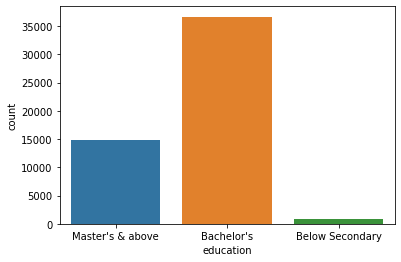

In [9]:
sns.countplot(train['education'])

In [10]:
train.groupby(['previous_year_rating']).count()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
previous_year_rating,,,,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741,11741,11741,11741


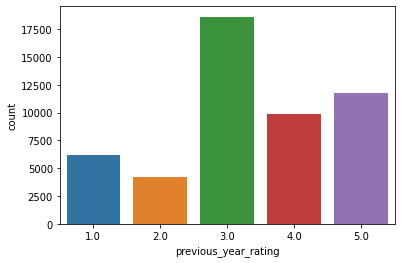

In [11]:
sns.countplot(train['previous_year_rating'])

In [12]:
train['education'].fillna(train['education'].mode()[0], inplace=True)

In [13]:
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(), inplace=True)

In [14]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
#lets separate the numerical and categorical columns for eda part

numerical = train.select_dtypes(include=[np.number])
categorical = train.select_dtypes(exclude=[np.number])

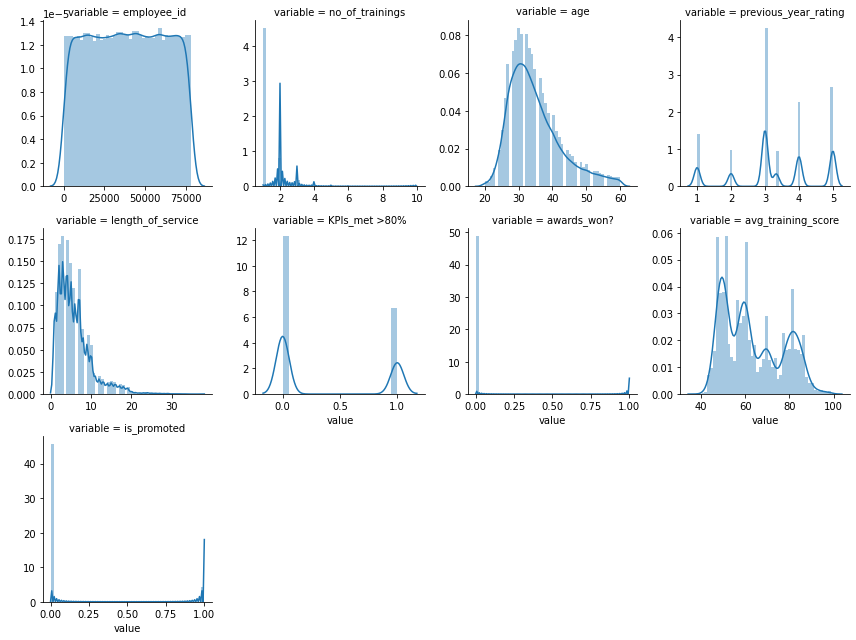

In [16]:
num = [f for f in train.columns if train.dtypes[f] != 'object']

nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [17]:
train.groupby(['is_promoted']).count()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


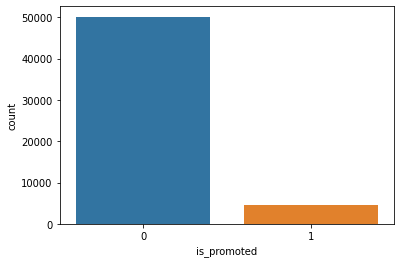

In [18]:
sns.countplot(train['is_promoted'])

In [19]:
#we can see that the target column is not balanced, we have to balance the target column

#Upsample minority classPython
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = train[train.is_promoted==0]
df_minority = train[train.is_promoted==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=50140,    # to match majority class
                                 random_state=150) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.is_promoted.value_counts()


1    50140
0    50140
Name: is_promoted, dtype: int64

In [20]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 14 columns):
employee_id             100280 non-null int64
department              100280 non-null object
region                  100280 non-null object
education               100280 non-null object
gender                  100280 non-null object
recruitment_channel     100280 non-null object
no_of_trainings         100280 non-null int64
age                     100280 non-null int64
previous_year_rating    100280 non-null float64
length_of_service       100280 non-null int64
KPIs_met >80%           100280 non-null int64
awards_won?             100280 non-null int64
avg_training_score      100280 non-null int64
is_promoted             100280 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 11.5+ MB


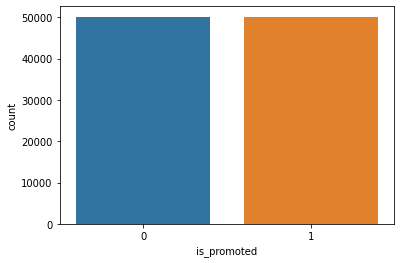

In [21]:
sns.countplot(df_upsampled['is_promoted'])

In [22]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#df_upsampled['department'] = le.fit_transform(df_upsampled['department'])
#df_upsampled['region'] = le.fit_transform(df_upsampled['region'])
#df_upsampled['education'] = le.fit_transform(df_upsampled['education'])
#df_upsampled['gender'] = le.fit_transform(df_upsampled['gender'])
#df_upsampled['recruitment_channel'] = le.fit_transform(df_upsampled['recruitment_channel'])

In [23]:
df_upsampled.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


is_promoted             1.000000
KPIs_met >80%           0.380469
avg_training_score      0.297918
previous_year_rating    0.287761
awards_won?             0.211013
employee_id             0.001110
length_of_service      -0.021230
age                    -0.033692
no_of_trainings        -0.051990
Name: is_promoted, dtype: float64 

----------------------
awards_won?          0.211013
employee_id          0.001110
length_of_service   -0.021230
age                 -0.033692
no_of_trainings     -0.051990
Name: is_promoted, dtype: float64


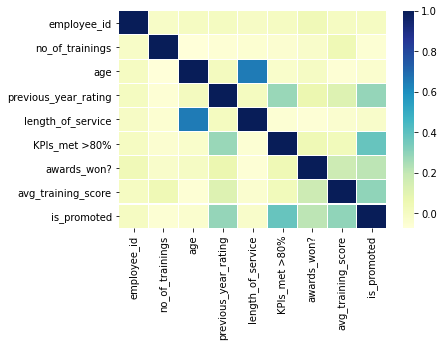

In [24]:
corr = df_upsampled.corr()
sns.heatmap(corr, cmap="YlGnBu", linewidths=0.1)
print (corr['is_promoted'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['is_promoted'].sort_values(ascending=False)[-5:]) #last 5 values`

### From above corelation matrix we can see that "prev year rating, KPI, avg training score, are related, lets explore them more now

In [25]:
df_upsampled['awards_won?'].value_counts()

0    93571
1     6709
Name: awards_won?, dtype: int64

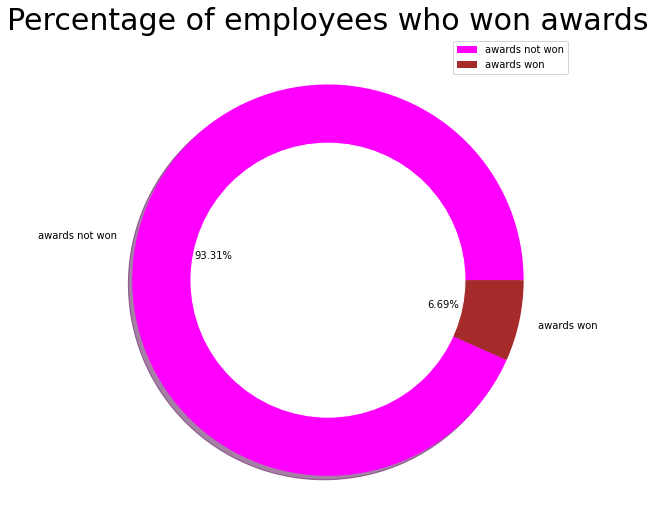

In [26]:
# plotting a donut chart for visualizing each of the awards won channel's share
size = [93571, 6709]
colors = ['magenta', 'brown']
labels = "awards not won", "awards won"
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

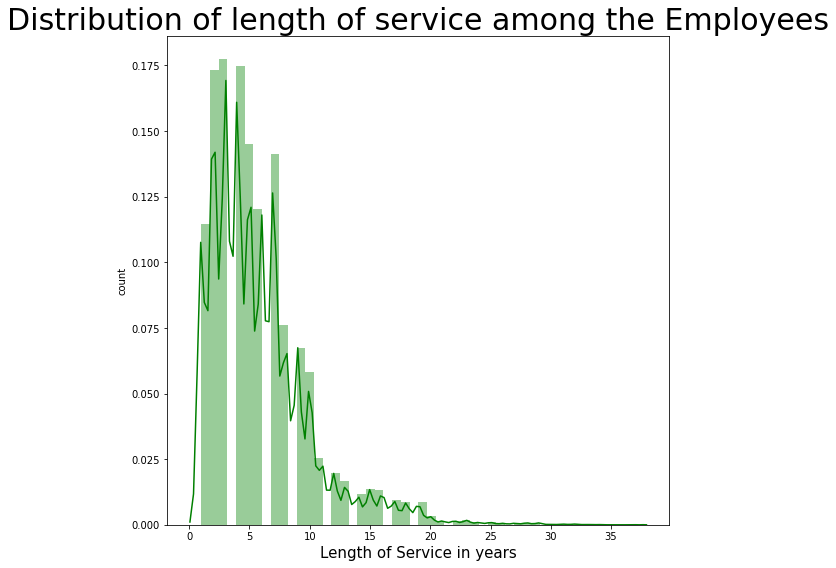

In [27]:
# checking the distribution of length of service

sns.distplot(df_upsampled['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

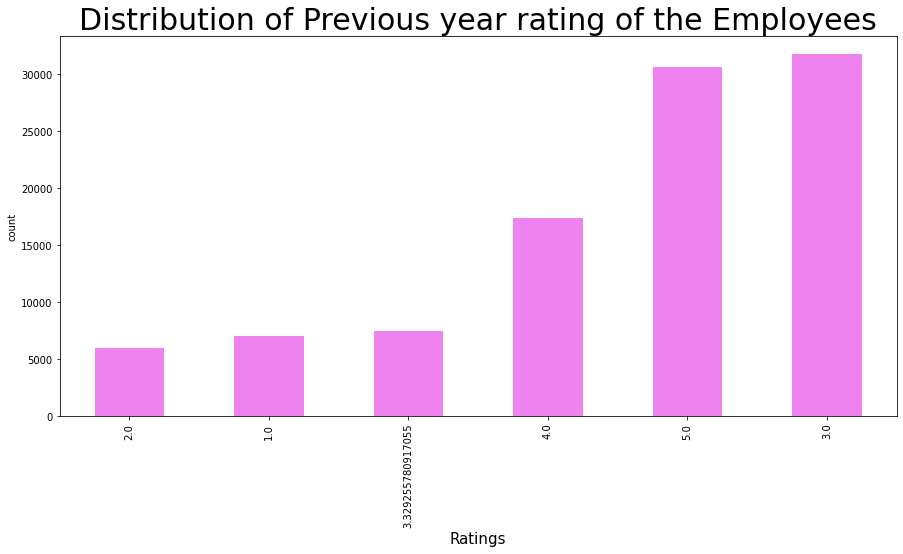

In [28]:
df_upsampled['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

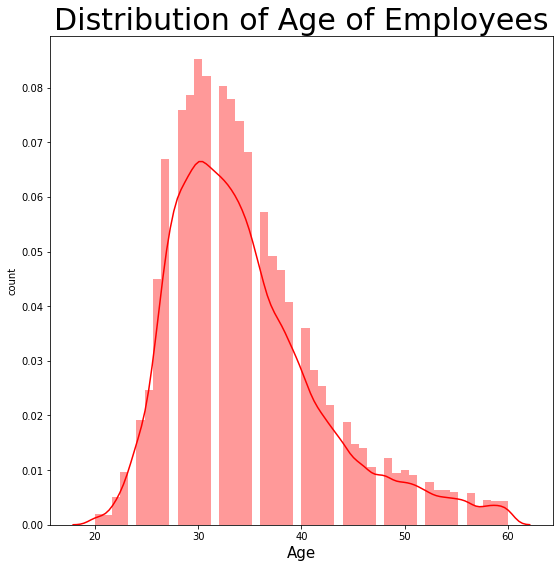

In [29]:

sns.distplot(df_upsampled['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

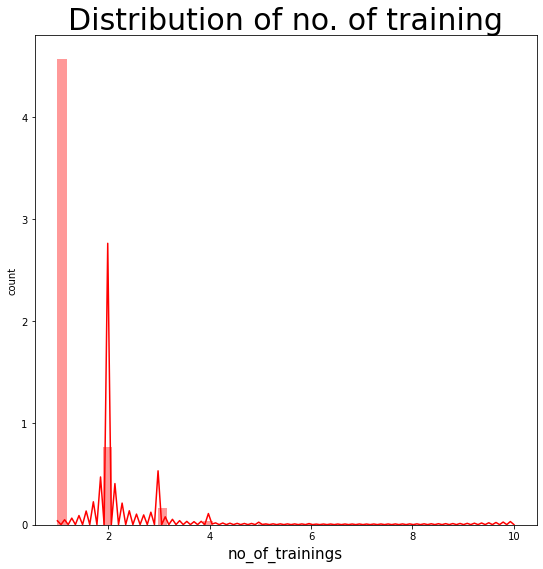

In [30]:
sns.distplot(df_upsampled['no_of_trainings'], color = 'red')
plt.title('Distribution of no. of training', fontsize = 30)
plt.xlabel('no_of_trainings', fontsize = 15)
plt.ylabel('count')
plt.show()

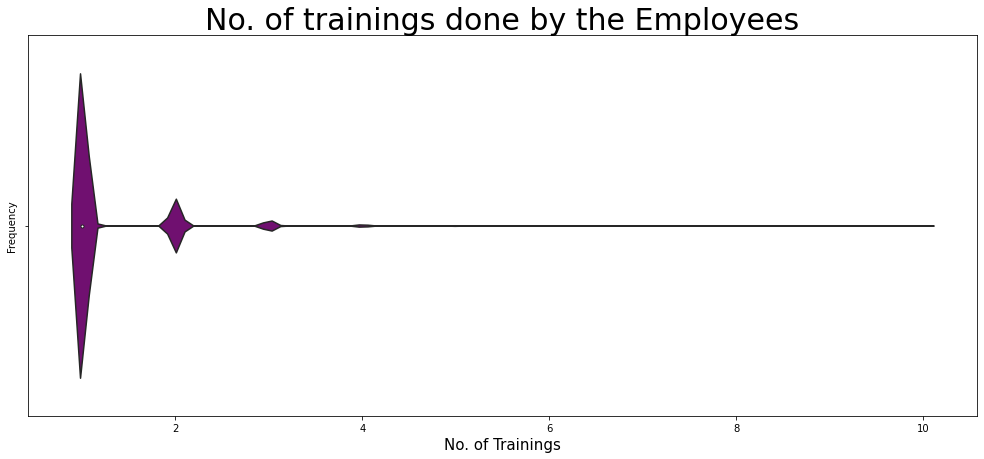

In [31]:
# checking the different no. of training done by the employees

plt.rcParams['figure.figsize'] = (17, 7)
sns.violinplot(df_upsampled['no_of_trainings'], color = 'purple')
plt.title('No. of trainings done by the Employees', fontsize = 30)
plt.xlabel('No. of Trainings', fontsize = 15)
plt.ylabel('Frequency')
plt.show()



In [32]:
#checking recruiment channel distribution
df_upsampled['recruitment_channel'].value_counts()

other       55375
sourcing    42358
referred     2547
Name: recruitment_channel, dtype: int64

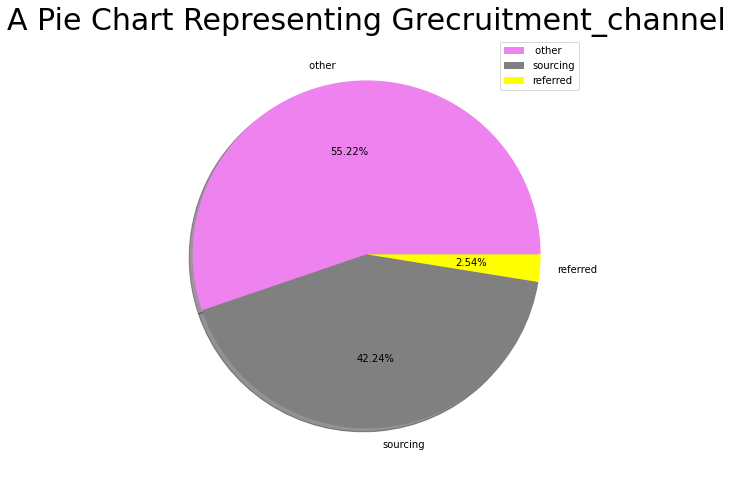

In [33]:
# plotting a pie chart


size = [55375, 42358, 2547]
labels = " other", "sourcing","referred"
colors = ['violet', 'grey','yellow']
explode = [0, 0, 0]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Grecruitment_channel', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

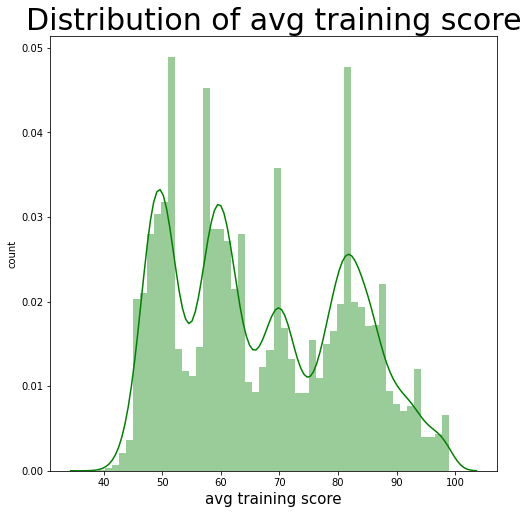

In [34]:
# checking the distribution of length of service

sns.distplot(df_upsampled['avg_training_score'], color = 'green')
plt.title('Distribution of avg training score', fontsize = 30)
plt.xlabel('avg training score', fontsize = 15)
plt.ylabel('count')
plt.show()

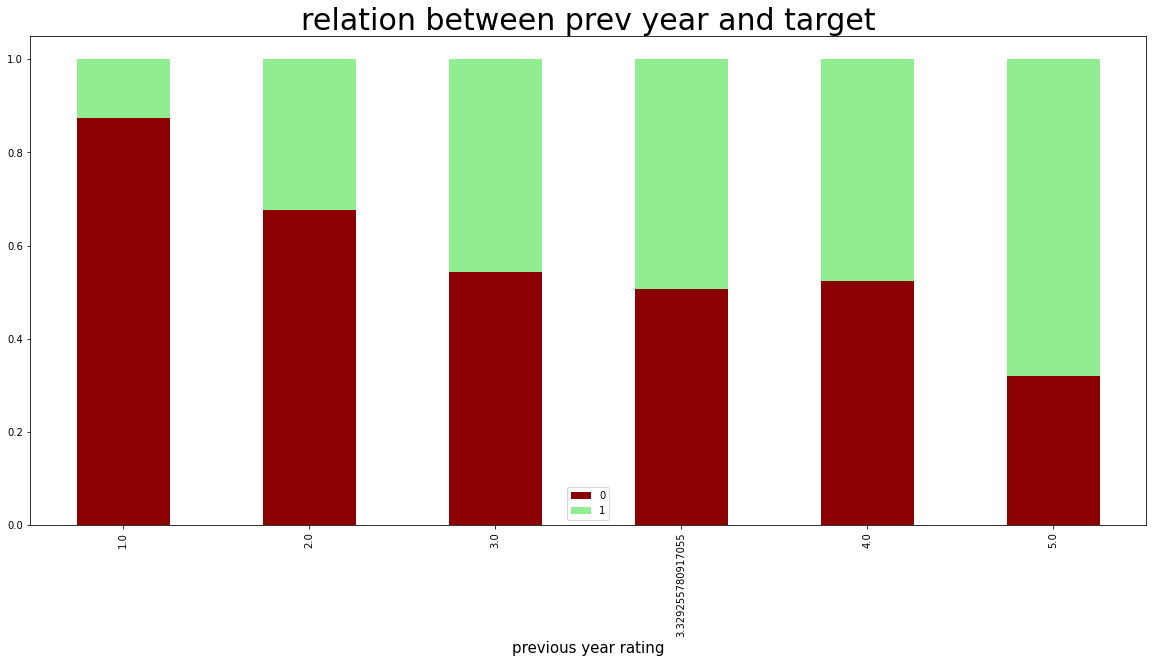

In [35]:
#  plot between average training score and is_promoted
data = pd.crosstab(df_upsampled['previous_year_rating'], df_upsampled['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])
plt.title('relation between prev year and target', fontsize = 30)
plt.xlabel('previous year rating', fontsize = 15)
plt.legend()
plt.show()

### from above graph we can see that as the rating increases the chances of promotion increases, also there is one value behaving bad

In [36]:
df_upsampled.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

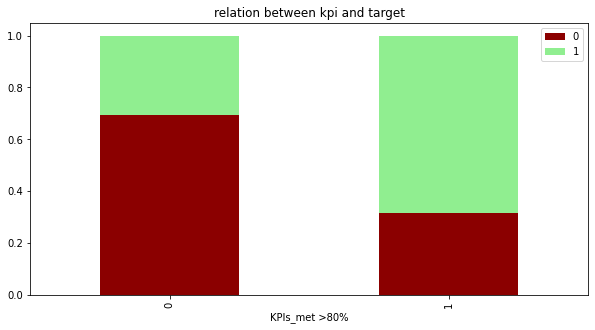

In [37]:
#  plot between kpi and is_promoted
data = pd.crosstab(df_upsampled['KPIs_met >80%'], df_upsampled['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['darkred', 'lightgreen'])
plt.title('relation between kpi and target', fontsize = 12)
plt.xlabel('KPIs_met >80%', fontsize = 10)
plt.legend()
plt.show()

### from above graph we can see that as the KPI increases the chances of promotion increases,

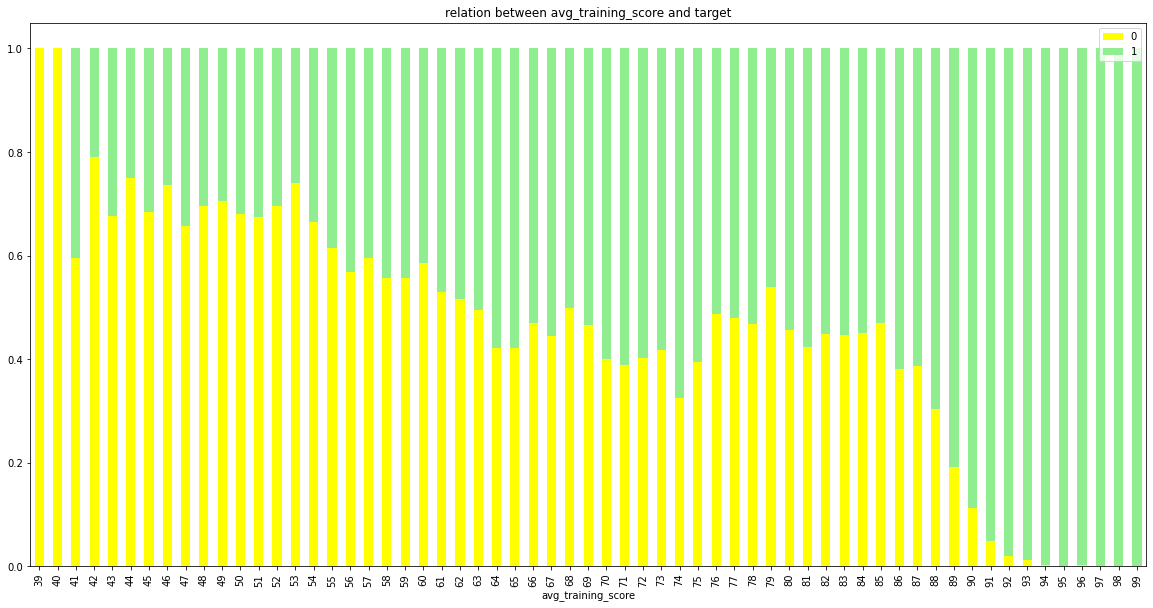

In [38]:
#  plot between kpi and is_promoted
data = pd.crosstab(df_upsampled['avg_training_score'], df_upsampled['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['yellow', 'lightgreen'])
plt.title('relation between avg_training_score and target', fontsize = 12)
plt.xlabel('avg_training_score', fontsize = 10)
plt.legend()
plt.show()

### from above graph we can see that as the KPI increases the chances of promotion increases,

In [39]:
train1 = df_upsampled.drop(['employee_id'], axis=1)
train1.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [40]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [41]:
test['education'].fillna(test['education'].mode()[0], inplace=True)

In [42]:
test['previous_year_rating'].fillna(test['previous_year_rating'].mean(), inplace=True)

In [43]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [44]:
emp_id = test['employee_id']

# remove employee id column

test1 = test.drop(['employee_id'], axis=True)
test1.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [45]:
x_test = test1
x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [46]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [47]:
train1.shape

(100280, 13)

In [48]:
# splitting the train set into dependent and independent sets

x = train1.iloc[:, :-1]
y = train1.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (100280, 12)
Shape of y: (100280,)


In [49]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [50]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)



Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224,)
Shape of y_valid:  (20056,)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

Training Accuracy : 0.9998254886318308


In [52]:
'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))
'''

NameError: name 'XGBClassifier' is not defined

In [ ]:
'''from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))
'

In [ ]:
'''from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", cbc.score(x_train, y_train))

In [ ]:
cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

In [ ]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3

In [53]:
# looking at the pattern of the submission file

submission = pd.read_csv('sample_submission_M0L0uXE.csv')

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [54]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': rfc_pred})

submission.head()



,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [55]:
# saving the submission file

filename = 'submission_promotion.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  submission_promotion.csv
